<a href="https://colab.research.google.com/github/jongchurlwon/github_test/blob/main/WON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install pyupbit

In [13]:
import pyupbit

In [14]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-ETH", interval="minute60")
df

,open,high,low,close,volume,value
2021-07-27 19:00:00,2582000.0,2599000.0,2573000.0,2592000.0,4896.608213,1.267626e+10
2021-07-27 20:00:00,2593000.0,2635000.0,2586000.0,2633000.0,5022.685177,1.309322e+10
2021-07-27 21:00:00,2632000.0,2670000.0,2608000.0,2656000.0,9509.048265,2.511007e+10
2021-07-27 22:00:00,2656000.0,2670000.0,2640000.0,2647000.0,7409.467854,1.969234e+10
2021-07-27 23:00:00,2647000.0,2655000.0,2585000.0,2617000.0,14109.565750,3.687737e+10
...,...,...,...,...,...,...
2021-08-04 22:00:00,3024000.0,3052000.0,2990000.0,3027000.0,18251.629844,5.518885e+10
2021-08-04 23:00:00,3026000.0,3063000.0,3018000.0,3058000.0,8278.772669,2.517276e+10
2021-08-05 00:00:00,3058000.0,3119000.0,3055000.0,3089000.0,13787.004082,4.259944e+10
2021-08-05 01:00:00,3086000.0,3145000.0,3086000.0,3124000.0,13425.069887,4.186727e+10


In [15]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-07-27 19:00:00,2592000.0
1,2021-07-27 20:00:00,2633000.0
2,2021-07-27 21:00:00,2656000.0
3,2021-07-27 22:00:00,2647000.0
4,2021-07-27 23:00:00,2617000.0
...,...,...
195,2021-08-04 22:00:00,3027000.0
196,2021-08-04 23:00:00,3058000.0
197,2021-08-05 00:00:00,3089000.0
198,2021-08-05 01:00:00,3124000.0


In [16]:
#prophet 불러옴
from fbprophet import Prophet

In [17]:
#학습
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [18]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

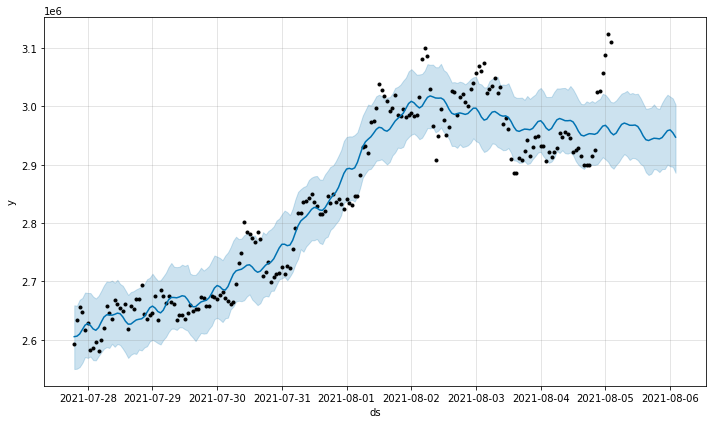

In [19]:
#그래프1
fig1 = model.plot(forecast)

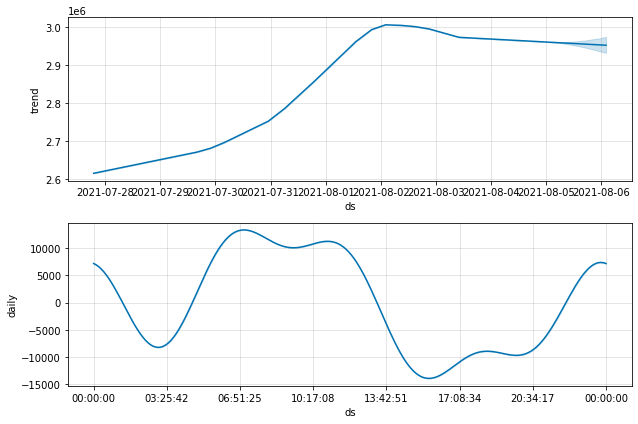

In [20]:
#그래프2
fig2 = model.plot_components(forecast)

In [22]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-ETH")
nowValue

3108000.0

In [23]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

2967762.9530885317

In [24]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  3108000.0
종가의 가격:  2967762.9530885317


In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-27 19:00:00,2.614446e+06,2.549671e+06,2.659000e+06,2.614446e+06,2.614446e+06,-9188.724881,-9188.724881,-9188.724881,-9188.724881,-9188.724881,-9188.724881,0.0,0.0,0.0,2.605257e+06
1,2021-07-27 20:00:00,2.615688e+06,2.550229e+06,2.658324e+06,2.615688e+06,2.615688e+06,-9610.193871,-9610.193871,-9610.193871,-9610.193871,-9610.193871,-9610.193871,0.0,0.0,0.0,2.606078e+06
2,2021-07-27 21:00:00,2.616931e+06,2.553109e+06,2.668491e+06,2.616931e+06,2.616931e+06,-7079.222940,-7079.222940,-7079.222940,-7079.222940,-7079.222940,-7079.222940,0.0,0.0,0.0,2.609852e+06
3,2021-07-27 22:00:00,2.618174e+06,2.560096e+06,2.671591e+06,2.618174e+06,2.618174e+06,-882.030873,-882.030873,-882.030873,-882.030873,-882.030873,-882.030873,0.0,0.0,0.0,2.617292e+06
4,2021-07-27 23:00:00,2.619417e+06,2.570426e+06,2.680883e+06,2.619417e+06,2.619417e+06,5490.166998,5490.166998,5490.166998,5490.166998,5490.166998,5490.166998,0.0,0.0,0.0,2.624907e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-08-05 22:00:00,2.953316e+06,2.892766e+06,3.014019e+06,2.938192e+06,2.969360e+06,-882.030873,-882.030873,-882.030873,-882.030873,-882.030873,-882.030873,0.0,0.0,0.0,2.952434e+06
220,2021-08-05 23:00:00,2.952989e+06,2.900318e+06,3.020086e+06,2.936450e+06,2.970141e+06,5490.166998,5490.166998,5490.166998,5490.166998,5490.166998,5490.166998,0.0,0.0,0.0,2.958479e+06
221,2021-08-06 00:00:00,2.952662e+06,2.897378e+06,3.016921e+06,2.935036e+06,2.971383e+06,7154.186760,7154.186760,7154.186760,7154.186760,7154.186760,7154.186760,0.0,0.0,0.0,2.959817e+06
222,2021-08-06 01:00:00,2.952335e+06,2.896591e+06,3.013667e+06,2.933351e+06,2.972889e+06,2537.484588,2537.484588,2537.484588,2537.484588,2537.484588,2537.484588,0.0,0.0,0.0,2.954873e+06
